In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_test=scaler.transform(X_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model=Sequential()

In [18]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.1)

Epoch 1/100
225/225 [==============================] - 3s 7ms/step - loss: 0.5047 - accuracy: 0.7831 - val_loss: 0.4623 - val_accuracy: 0.8037
Epoch 2/100
225/225 [==============================] - 2s 7ms/step - loss: 0.4577 - accuracy: 0.7939 - val_loss: 0.4359 - val_accuracy: 0.8037
Epoch 3/100
225/225 [==============================] - 2s 7ms/step - loss: 0.4373 - accuracy: 0.8014 - val_loss: 0.4204 - val_accuracy: 0.8125
Epoch 4/100
225/225 [==============================] - 2s 7ms/step - loss: 0.4228 - accuracy: 0.8186 - val_loss: 0.4085 - val_accuracy: 0.8213
Epoch 5/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4067 - accuracy: 0.8290 - val_loss: 0.3940 - val_accuracy: 0.8325
Epoch 6/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3892 - accuracy: 0.8421 - val_loss: 0.3797 - val_accuracy: 0.8425
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.3730 - accuracy: 0.8507 - val_loss: 0.3698 - val_accuracy: 0.8500

In [22]:
model.layers[1].get_weights()

[array([[ 0.3662429 , -0.19502641,  0.47894073,  0.47228134, -0.03049366,
         -0.85785353, -0.22853698, -0.44555402, -0.5160993 , -0.06508175,
          0.29836303],
        [-0.38548133,  0.1598724 ,  0.9623035 ,  0.01855105, -0.61661524,
          0.3248394 ,  0.09260423, -0.6295753 ,  0.22797818, -1.2527008 ,
         -0.2193019 ],
        [-0.14649613, -0.69580775, -0.34480065,  0.09101419, -0.32009903,
          0.389563  ,  0.21532987,  0.556747  , -0.5149961 ,  0.29370674,
          0.52086174],
        [ 0.36037177, -0.13913028,  0.51453626, -0.02603399,  0.4673207 ,
          0.03148042, -0.6707963 , -1.4600983 , -0.06243958,  0.31680378,
          0.12835325],
        [ 0.32035586,  0.5653046 , -0.57024974, -0.13020234,  0.35718518,
         -0.57289684, -0.10750394,  0.31577563,  0.35524565,  0.58789456,
         -0.13937958],
        [ 0.5224579 ,  0.6058046 , -0.6325727 ,  0.37697992,  0.12179501,
          0.21777913, -0.76788425,  0.19389832,  0.41578808, -0.9099954

In [23]:
y_log=model.predict(X_test_test)

63/63 [==============================] - 0s 2ms/step


In [24]:
y_pred=np.where(y_log>0.5, 1, 0)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(Y_test,y_pred)

0.8605

In [27]:
import matplotlib.pyplot as plt

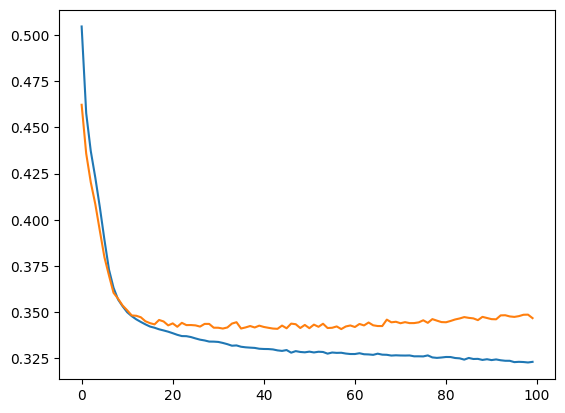

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

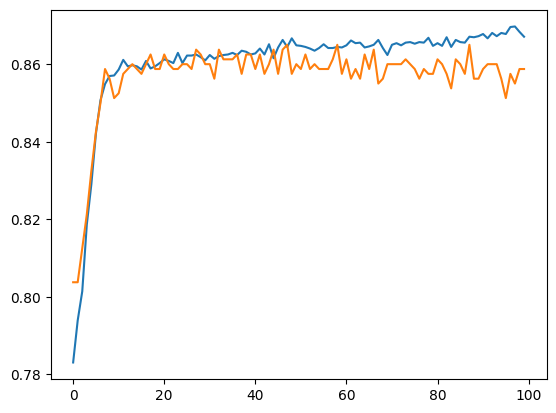

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])